In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


(480, 960, 3)

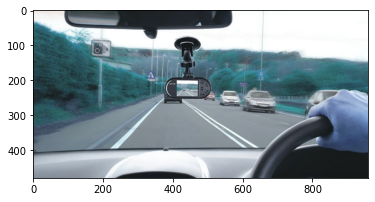

In [23]:
image_c = cv2.imread('test1.jpg')
plt.imshow(image_c)
image_c.shape

(480, 960)

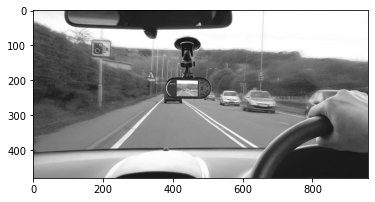

In [24]:
image_g = cv2.cvtColor(image_c, cv2.COLOR_RGB2GRAY)
plt.imshow(image_g, cmap = 'gray' )
image_g.shape

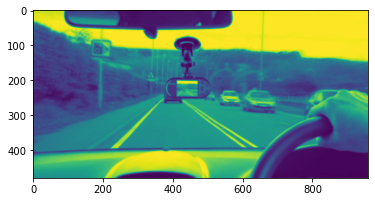

In [25]:
image_blurred = cv2.GaussianBlur(image_g ,(7,7), 0 )
plt.imshow(image_blurred)

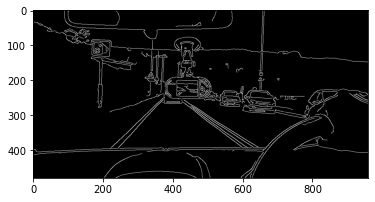

In [26]:
threshold_low = 10
threshold_high = 100
image_canny = cv2.Canny(image_blurred,threshold_low,threshold_high)
plt.imshow(image_canny, cmap = 'gray')

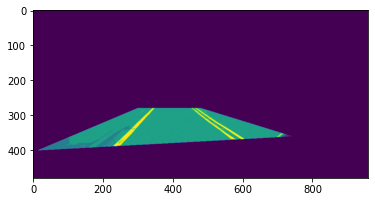

In [27]:
vertices = np.array([[(15,400),(300,280),(480,280),(740,360)]], dtype=np.int32)
mask = np.zeros_like(image_g)
cv2.fillPoly(mask, vertices,225)
masked_image= cv2.bitwise_and(image_g, mask)
plt.figure()
plt.imshow(masked_image)

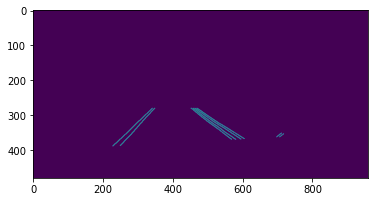

In [28]:
masked_image = cv2.bitwise_and(image_canny,mask)
plt.figure()
plt.imshow(masked_image)

In [29]:
 rho = 2
theta = np.pi/180
threshold = 40
min_line_len = 100
max_line_gap = 50
lines = cv2.HoughLinesP(masked_image, rho,theta, threshold,np.array([]),minLineLength = min_line_len, maxLineGap=max_line_gap)

line_image= np.zeros((masked_image.shape[0],masked_image.shape[1], 3), dtype=np.uint8)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),[250,0,0],20)
lines


array([[[485, 296, 596, 368]],

       [[463, 280, 590, 357]],

       [[467, 292, 569, 369]],

       [[229, 388, 341, 280]],

       [[458, 280, 581, 369]],

       [[249, 387, 349, 280]],

       [[453, 280, 578, 368]],

       [[454, 280, 580, 368]]], dtype=int32)

In [30]:
α= 1
β = 1
Ɣ= 0

image_with_lines=cv2.addWeighted(image_c,α,line_image,β,Ɣ)

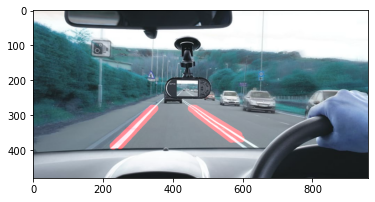

In [31]:
plt.figure()
plt.imshow(image_with_lines)

In [ ]:
BN